In [1]:
import pandas as pd 
import numpy as numpy 
import itertools
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [2]:
X_train = pd.read_csv('X_train.csv')
X_eval = pd.read_csv('X_eval.csv')

In [3]:
X_train.columns

Index(['id', 'obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD',
       'fiber_ID', 'label'],
      dtype='object')

# Descriptive statistics with target 

## Mean

In [4]:
float_columns = (X_train
           .loc[:, ~X_train.columns.str.contains("ID", case=False)]  
           .select_dtypes(include='float')
          ).columns.tolist()

In [5]:
grouped = X_train.groupby('label')[float_columns]
mean_stats = grouped.mean()

In [6]:
mean_stats

,alpha,delta,u,g,r,i,z,redshift
label,,,,,,,,
0,178.224682,23.558549,22.582699,20.910016,19.591818,18.854952,18.451507,0.422649
1,180.102148,27.088382,21.545636,20.934445,20.631858,20.440940,20.267341,1.702720
2,173.599276,23.518771,21.155801,19.606786,18.937277,18.530198,18.318673,-0.000110


**Key Takeaways:**
- **Quasars**: Quasars stand out due to their high redshift, bright ultraviolet emission, and relatively dim magnitudes in visible and infrared bands, reflecting their energetic but distant nature.
- **Stars**: Stars are the brightest in most photometric bands, particularly in visible and infrared wavelengths, and have negligible redshift, consistent with their proximity to Earth.
- **Galaxies**: Galaxies exhibit intermediate photometric and redshift characteristics, bridging the properties of stars and quasars.  

These differences are consistent with the physical and observational properties of these celestial objects.

## Std

In [7]:
std_stats = grouped.std()

In [8]:
std_stats

,alpha,delta,u,g,r,i,z,redshift
label,,,,,,,,
0,94.133351,19.264880,2.253554,2.103469,1.873743,1.688373,1.654711,0.265794
1,98.631680,19.501544,1.482104,1.159334,1.078025,1.085852,1.086682,0.905345
2,99.407536,20.416866,2.354608,2.107185,1.967690,1.839436,1.841227,0.000461


 **Key Takeaways:**
1. **Spatial Distribution:** Stars and quasars exhibit broader spatial variability in both `alpha` and `delta`, while galaxies are more localized.
2. **Photometric Properties:**  
   - Stars display the greatest variability across most photometric bands, highlighting their diverse brightness levels and spectral types.  
   - Quasars are more consistent in their brightness, especially in the visible and infrared bands, reflecting their energetic but standardized emissions.  
   - Galaxies show moderate variability, as expected for heterogeneous collections of stars, gas, and other components.  
3. **Redshift Variability:**  
   - Quasars stand out with significant redshift variability, indicating their diverse distances.  
   - Galaxies exhibit moderate redshift variability, and stars have almost no variability due to their proximity.  

These results confirm the distinct nature of the three classes of objects, with stars being diverse and local, quasars being distant and uniform, and galaxies representing intermediate variability and distance.

## Max and Min

In [9]:
max_stats = grouped.max()

In [10]:
max_stats

,alpha,delta,u,g,r,i,z,redshift
label,,,,,,,,
0,359.994125,74.459854,28.77812,29.86258,29.57186,30.16359,27.80519,1.995524
1,359.974292,82.288657,29.19901,26.62495,25.22189,32.14147,28.79055,7.011245
2,359.999810,83.000519,29.18637,28.90320,27.59332,26.89399,26.42779,0.004153


In [11]:
min_stats = grouped.min()

In [12]:
min_stats

,alpha,delta,u,g,r,i,z,redshift
label,,,,,,,,
0,0.005528,-10.628261,14.50678,12.67902,11.74664,11.29956,10.89738,-0.006055
1,0.025716,-12.301875,16.15195,15.53207,15.33003,14.91405,14.59287,0.000461
2,0.029838,-17.636198,12.10168,10.49820,10.06854,10.00865,10.22551,-0.004136


## Quantiles

In [13]:
lower_quartile = grouped.quantile(0.25)
median = grouped.quantile(0.5)
upper = grouped.quantile(0.75)

In [14]:
lower_quartile

,alpha,delta,u,g,r,i,z,redshift
label,,,,,,,,
0,131.639265,5.191370,20.807610,18.930820,17.823960,17.38230,17.097850,0.166200
1,128.652380,7.885125,20.657320,20.259165,20.021590,19.82794,19.654760,1.093049
2,114.361147,3.121771,19.330157,18.036983,17.457628,17.14523,16.967118,-0.000289


In [15]:
median

,alpha,delta,u,g,r,i,z,redshift
label,,,,,,,,
0,181.192198,22.397191,22.830760,21.58002,20.10086,19.222380,18.76627,0.456313
1,183.691598,29.911196,21.503810,21.05833,20.78035,20.586350,20.37097,1.603800
2,173.080400,23.386763,21.024185,19.54649,18.94273,18.572655,18.30124,-0.000075


In [16]:
upper

,alpha,delta,u,g,r,i,z,redshift
label,,,,,,,,
0,231.255225,38.050972,24.187110,22.446960,20.97636,19.94826,19.473260,0.596254
1,235.610113,43.057186,22.266825,21.683355,21.40925,21.19573,20.990225,2.195952
2,240.190104,40.046986,22.954633,21.222020,20.54675,20.01987,19.716815,0.000076


 **Key Observations:**
1. **Spatial Distribution:**  
   Quasars are found at higher declinations with a more compact distribution compared to galaxies and stars. Stars are widely spread across the sky.

2. **Photometric Profiles:**  
   - **Stars** dominate the brightness in all photometric bands, with consistently low median values in `u`, `g`, `r`, `i`, and `z`.  
   - **Quasars** are bright in the UV (`u`) and maintain relatively high magnitudes in other bands, reflecting their energetic emissions but distant nature.  
   - **Galaxies** are generally dimmer in all bands, showing intermediate brightness levels.

3. **Redshift:**  
   - **Quasars** are the farthest and exhibit a wide range of redshift values.  
   - **Galaxies** show moderate redshift, while stars remain effectively at zero.

## Corr

In [17]:
corr_stats = (grouped
 .corr(method='spearman')         # Compute the correlation matrix
 .style
 .background_gradient(cmap='RdBu', vmax=1, vmin=-1)  # Apply the gradient style
 .set_sticky(axis='index')        # Make the index sticky
)

In [18]:
corr_stats

 **Key Observations**
The correlation statistics align with the physical characteristics of these astronomical objects:
- **Galaxies:** Smooth spectral distributions and moderate redshift correlations due to their large-scale, cosmological nature.
- **Quasars:** Energetic, consistent emissions with weak redshift correlations due to their extreme distances and variability.
- **Stars:** Diverse photometric properties with negligible redshift effects, reflecting their local and varied nature.

# Overlapping histogram plots 

In [19]:
def plot_histogram(column):
    """
    Plots an overlapped histogram for the specified column in X_train
    for each label {0, 1, 2}.
    
    Args:
        column (str): The name of the column to plot.
    """
    labels = [0, 1, 2]
    plt.figure(figsize=(10, 6))
    
    for label in labels:
        subset = X_train[X_train['label'] == label]
        plt.hist(subset[column], bins=15, alpha=0.5, label=f'Label {label}')
    
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Overlapped Histogram for {column}')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


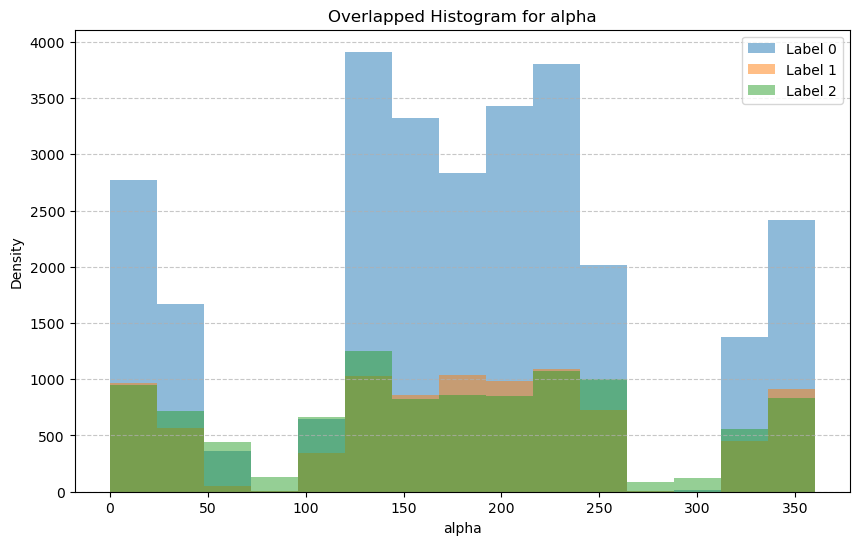

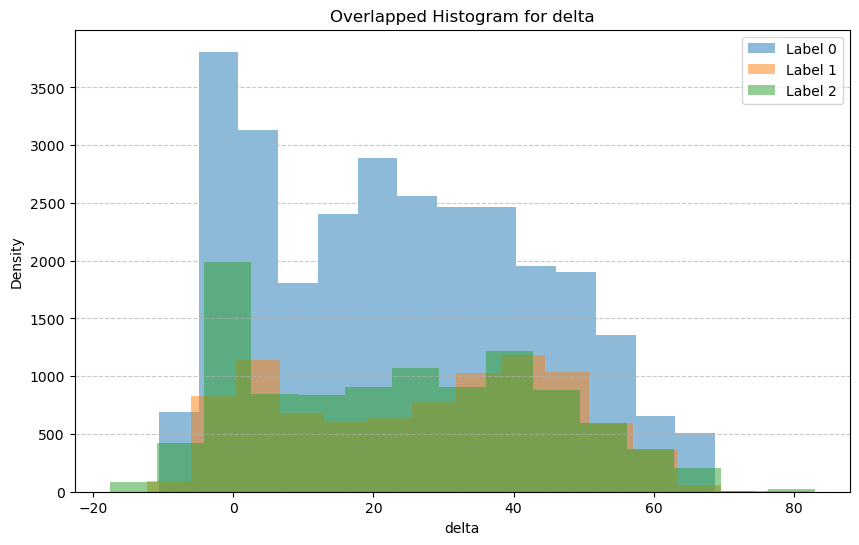

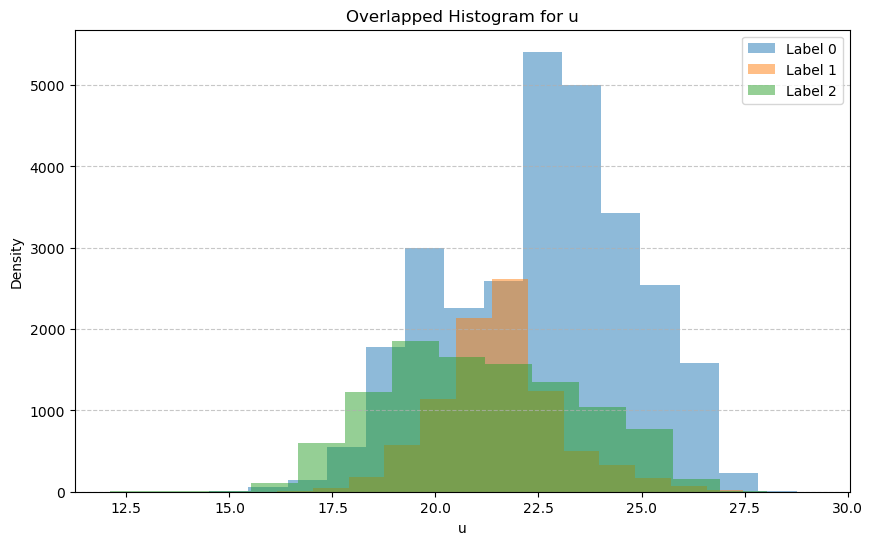

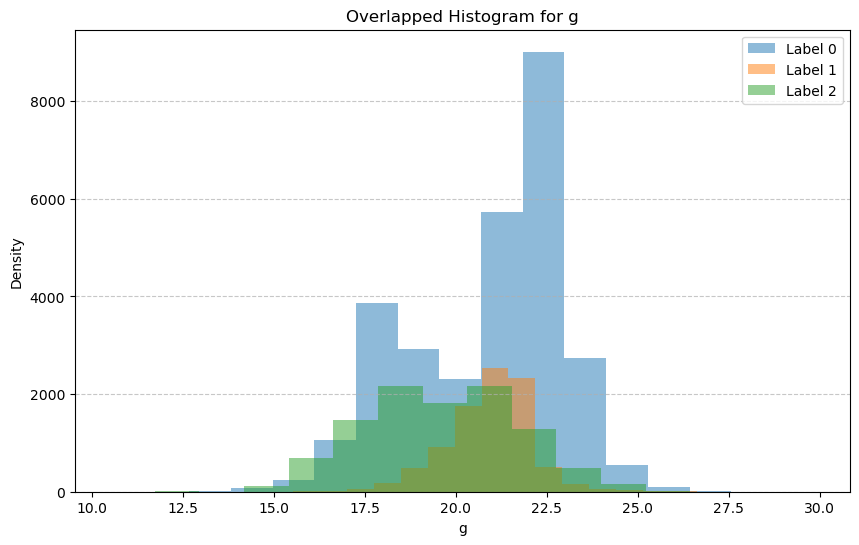

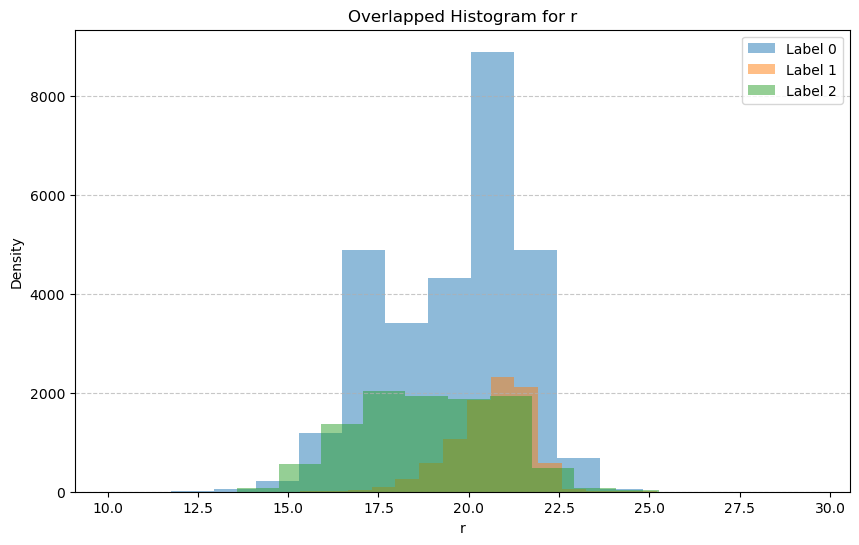

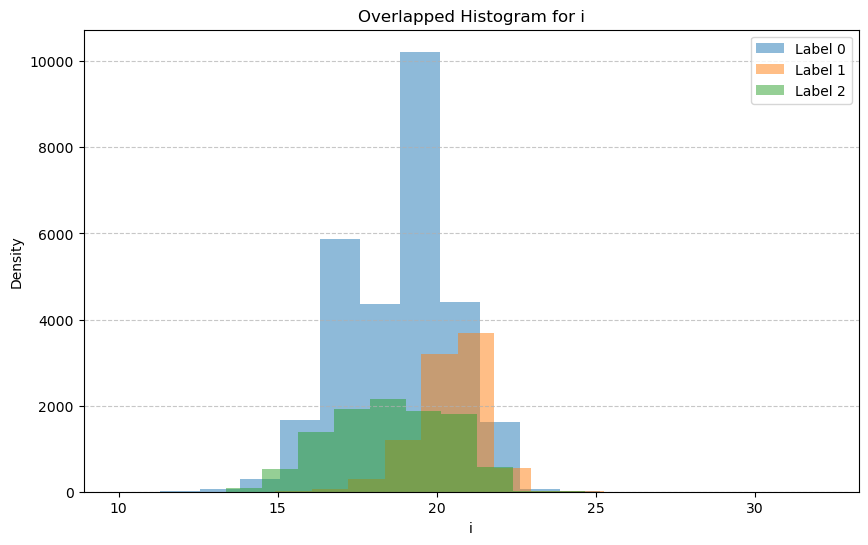

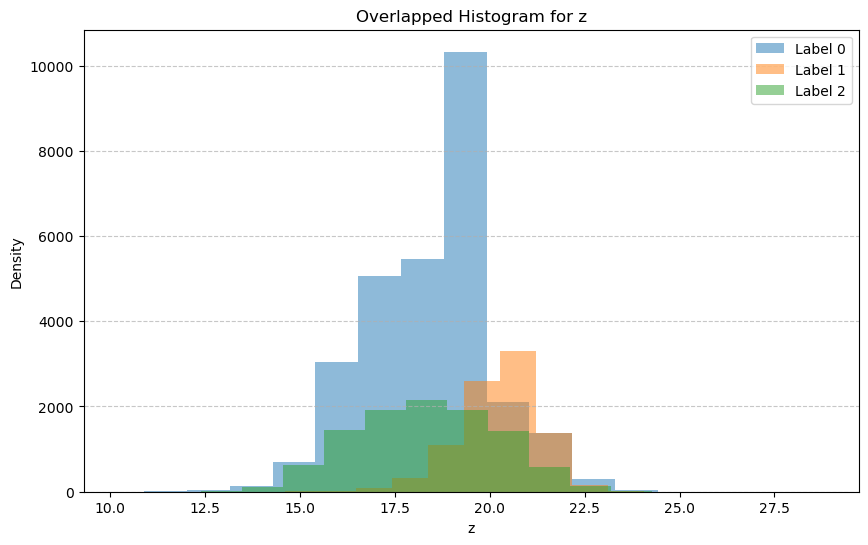

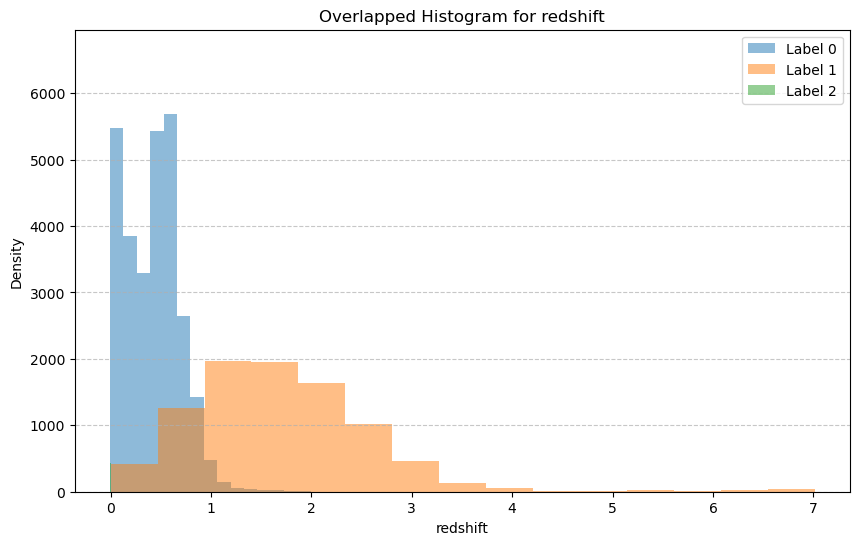

In [20]:
for column in float_columns: 
    plot_histogram(column)

# Overlapping kde

In [21]:
def plot_kde(column):
    """
    Plots an overlapped KDE plot for the specified column in X_train
    for each label {0, 1, 2}.
    
    Args:
        column (str): The name of the column to plot.
    """
    labels = [0, 1, 2]
    plt.figure(figsize=(10, 6))
    
    for label in labels:
        subset = X_train[X_train['label'] == label]
        sns.kdeplot(
            subset[column], 
            label=f'Label {label}', 
            fill=True, 
            alpha=0.3
        )
    
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Overlapped KDE Plot for {column}')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


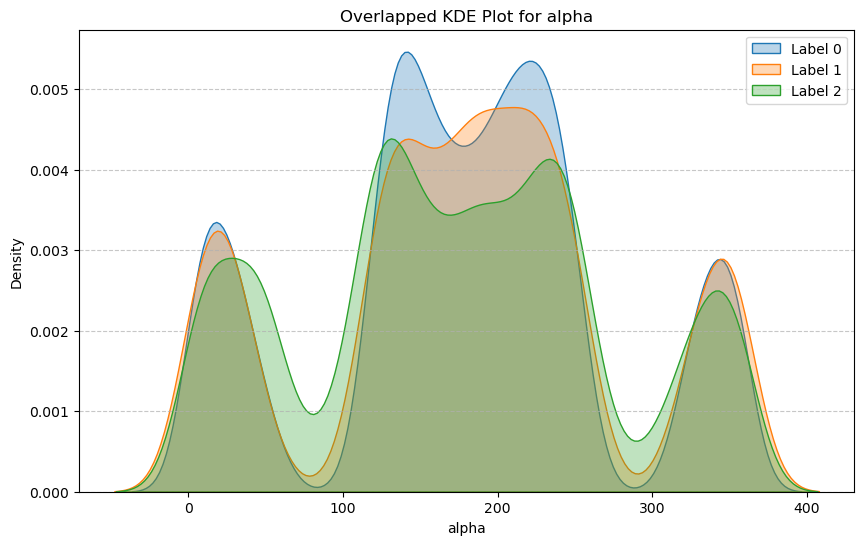

/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


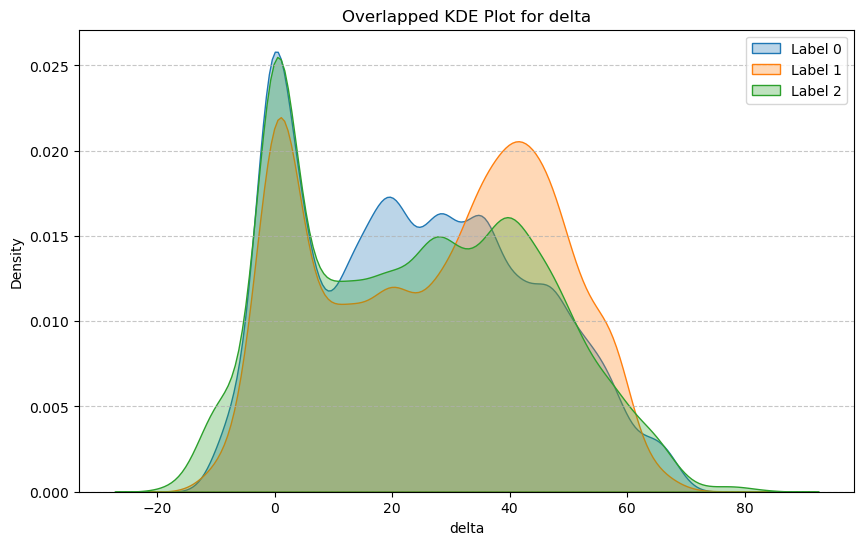

/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


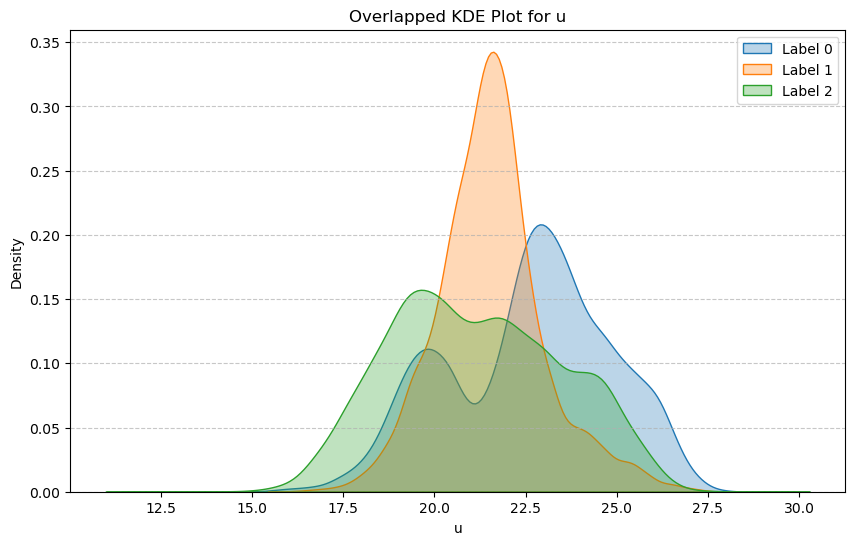

/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


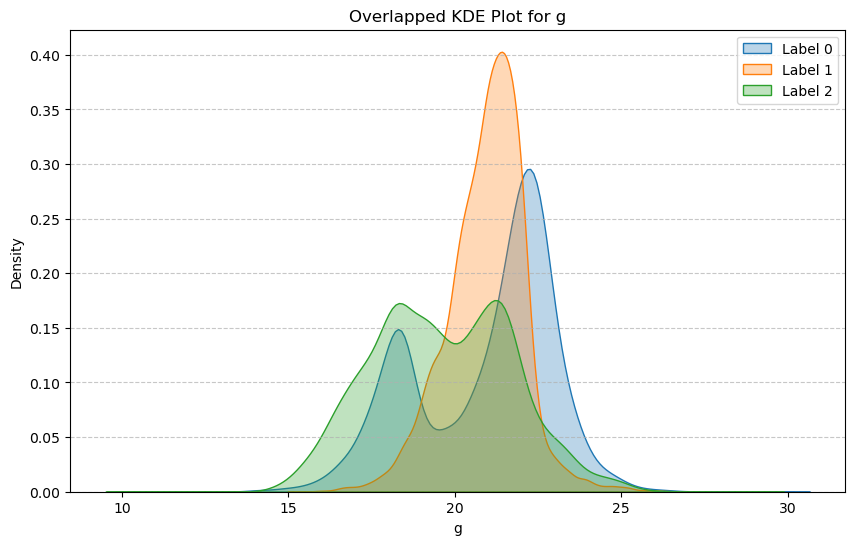

/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


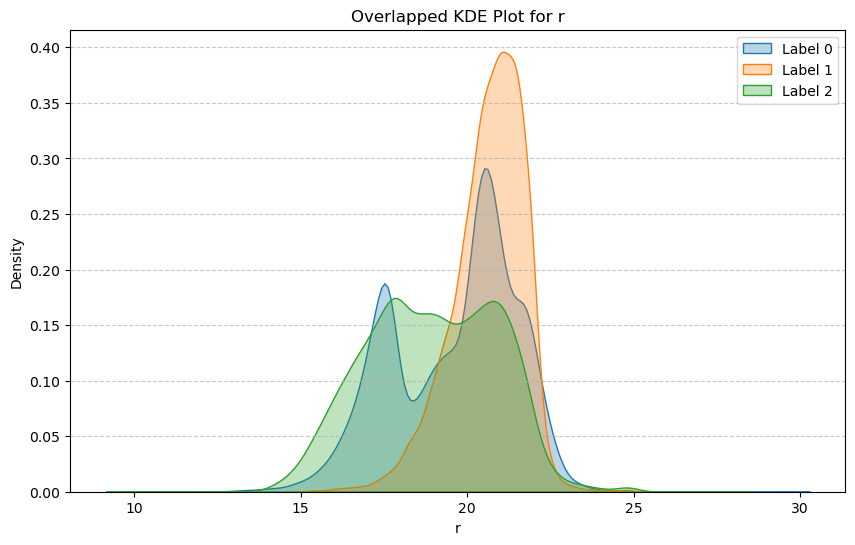

/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


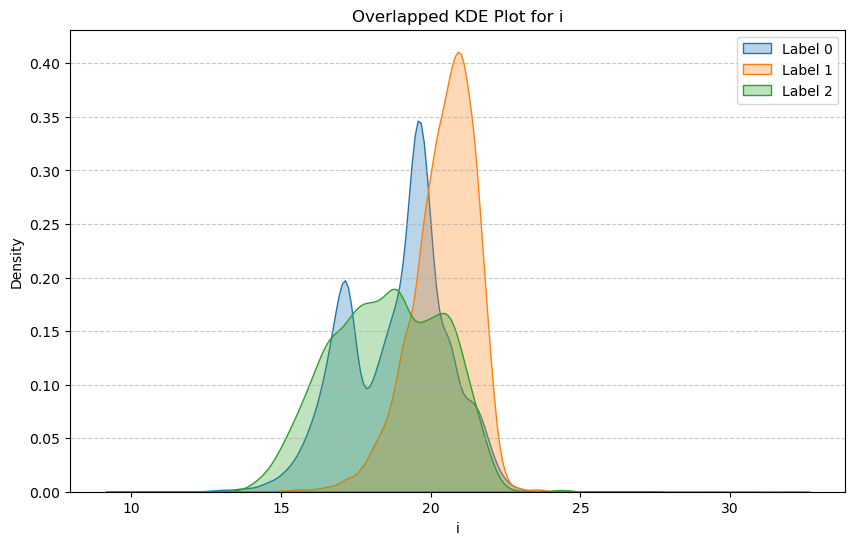

/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


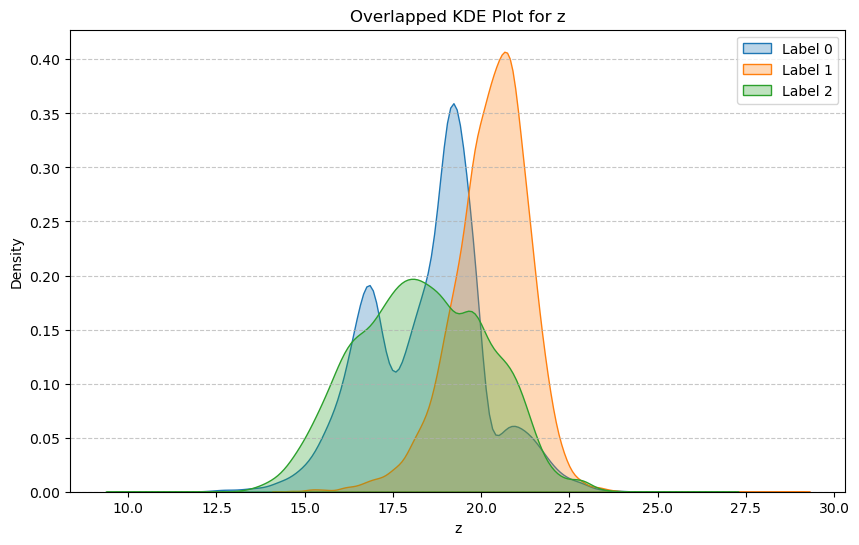

/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ric_carollo/opt/anaconda3/envs/taxi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


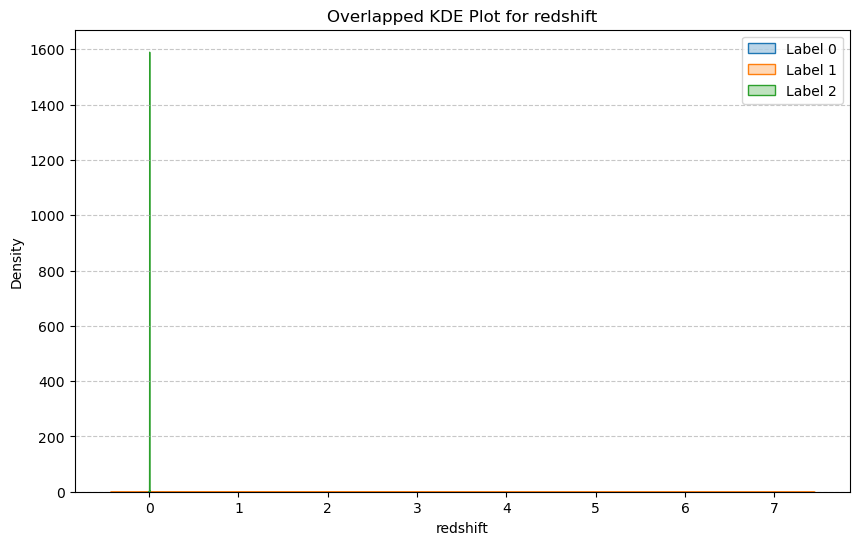

In [22]:
for column in float_columns: 
    plot_kde(column)

In [23]:
columns = X_train.columns
other_columns = [x for x in columns if x not in float_columns]

In [24]:
other_columns

['id',
 'obj_ID',
 'run_ID',
 'cam_col',
 'field_ID',
 'spec_obj_ID',
 'plate',
 'MJD',
 'fiber_ID',
 'label']

In [25]:
other_columns = ['fiber_ID', 'cam_col']

# Cam_col analysis 

In [26]:
crosstab_result = pd.crosstab(X_train['label'], X_train['cam_col'])
crosstab_result

cam_col,1,2,3,4,5,6
label,,,,,,
0,3918,4806,5427,5687,5467,3292
1,1101,1577,1911,1612,1630,1204
2,1277,1878,1830,1960,1835,1588


 **Key Observations**
1. **Dominance of Galaxies**:
   - Class 0 (galaxies) consistently has the highest counts across all `cam_col`, confirming galaxies are the most prevalent object type.

2. **Camera Column Effects**:
   - All classes peak in `cam_col` 4, suggesting it captures a higher density of observations compared to other columns.
   - `cam_col` 6 consistently has the lowest counts for all classes, which might reflect lower coverage or sensitivity in this column.

3. **Relative Distributions**:
   - Class proportions within each column are similar:
     - For `cam_col` 1: 3959 (galaxies), 1118 (quasars), 1262 (stars).
     - For `cam_col` 4: 5687 (galaxies), 1611 (quasars), 1954 (stars).
   - This suggests the class distributions remain stable, regardless of camera column.

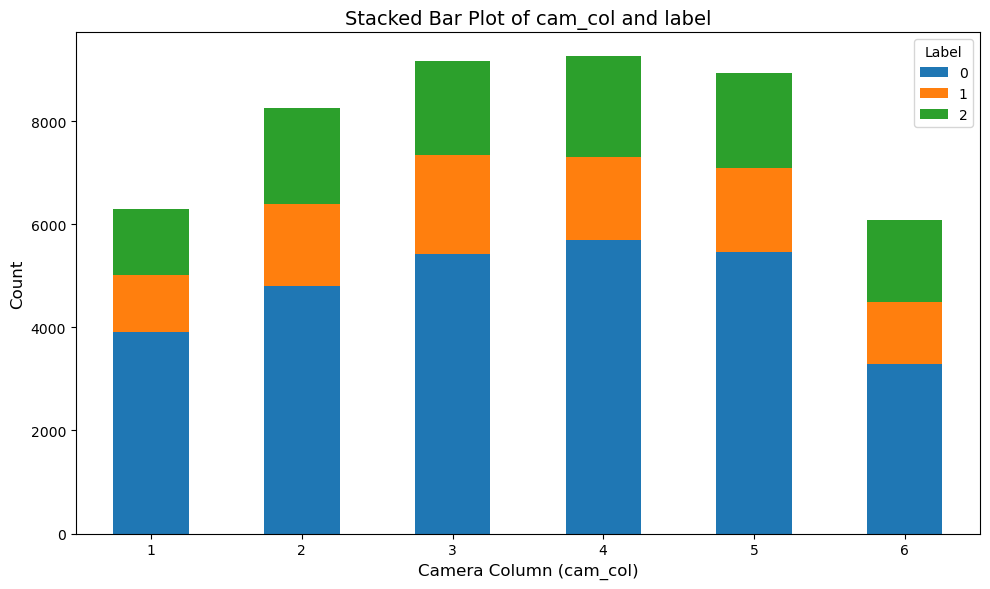

In [27]:
cross_tab = pd.crosstab(index=X_train['cam_col'], columns=X_train['label'])

# Plot the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Camera Column (cam_col)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Stacked Bar Plot of cam_col and label', fontsize=14)
ax.legend(title='Label', fontsize=10)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

# Clustering 

## Kmeans PCA pipeline

In [28]:
float_columns = (X_train
           .loc[:, ~X_train.columns.str.contains("ID", case=False)]  
           .select_dtypes(include='float')
          ).columns.tolist()

In [29]:
pipeline_PCA = Pipeline([
    ('standardise', StandardScaler()), 
    ('reduce', PCA(n_components = 2))
])

X_train_PCA = pd.DataFrame(data = pipeline_PCA.fit_transform(X_train[float_columns]), columns = ['first_component', 'second_component'])

In [30]:
X_train_PCA['label'] = X_train['label']

In [31]:
pipeline_PCA.named_steps['reduce'].explained_variance_ratio_ 

array([0.56215212, 0.14323312])

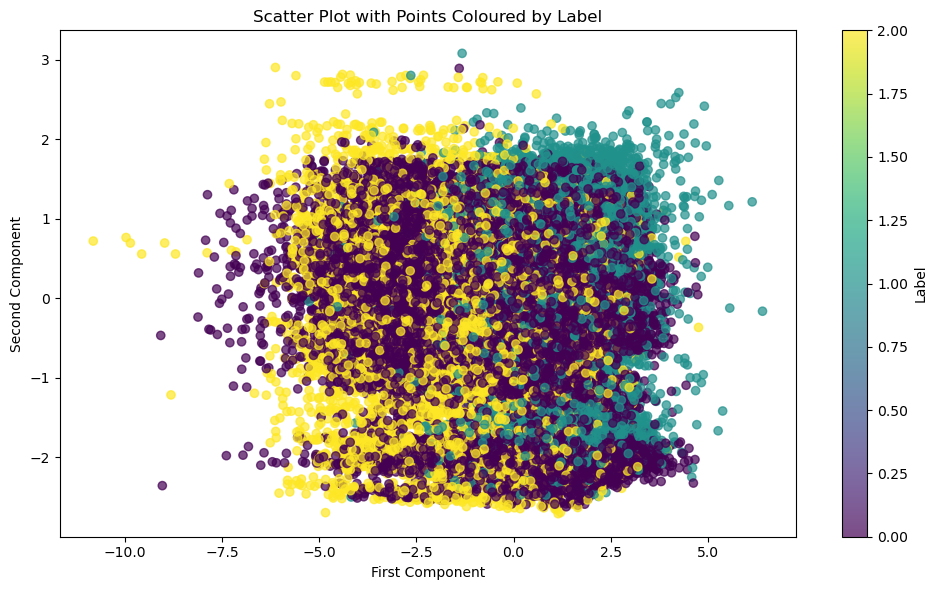

In [32]:
# Assuming label is a Series that corresponds to each row in X_train_PCA
# Replace 'label' with the actual Series variable if named differently

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Scatter plot with points coloured by label
scatter = axes.scatter(
    X_train_PCA['first_component'],
    X_train_PCA['second_component'],
    c=X_train_PCA['label'],  # Colour by label
    cmap='viridis',  # Choose a colormap
    alpha=0.7  # Set transparency
)

# Add a colour bar
cbar = plt.colorbar(scatter, ax=axes)
cbar.set_label('Label')

# Add titles and axis labels
axes.set_title('Scatter Plot with Points Coloured by Label')
axes.set_xlabel('First Component')
axes.set_ylabel('Second Component')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [33]:
pipeline_PCA_2 = Pipeline([
    ('standardise', StandardScaler()), 
    ('reduce', PCA(n_components = 0.95)), 
])
k = 5
k_means = KMeans(n_clusters = 5, random_state = 42) 

In [34]:
X_train_reduced = pipeline_PCA_2.fit_transform(X_train[float_columns])
y_train_pred = k_means.fit_predict(X_train_reduced)

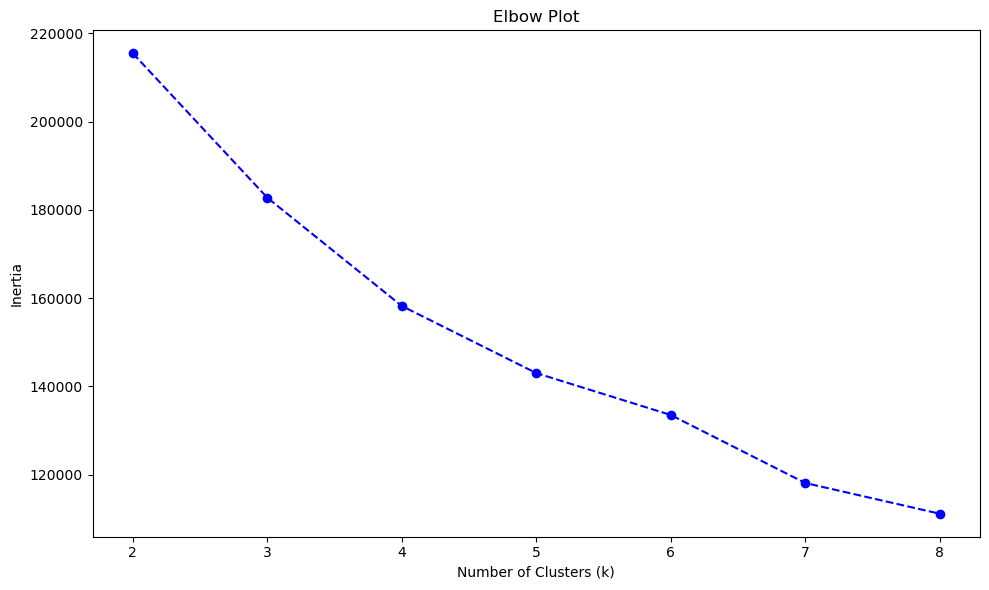

In [35]:
# Range of k values to evaluate
k_range = range(2, 9)

# To store results for plotting
inertia = []
silhouette_scores = []

# Loop over the different k values
for k in k_range:
    # Fit the KMeans model
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(X_train_reduced)
    
    # Inertia for the Elbow Plot
    inertia.append(k_means.inertia_)

# Plot the Elbow Curve (Inertia)
plt.figure(figsize=(10, 6))

plt.plot(k_range, inertia, marker='o', color='b', linestyle='--')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Show both plots
plt.tight_layout()
plt.show()

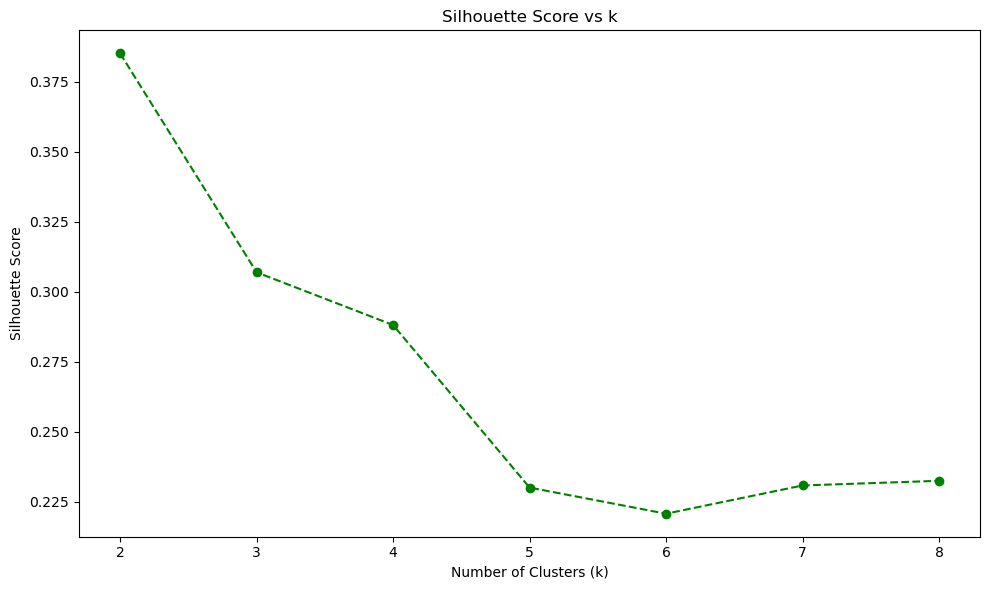

In [36]:
# Range of k values to evaluate
k_range = range(2, 9)

silhouette_scores = []

# Loop over the different k values
for k in k_range:
    # Fit the KMeans model
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(X_train_reduced)
    
    # Calculate silhouette score for the current k
    silhouette_avg = silhouette_score(X_train_reduced, k_means.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='g', linestyle='--')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

# Show both plots
plt.tight_layout()
plt.show()

In [37]:
k = 2
k_means = KMeans(n_clusters = k, random_state = 42) 

In [38]:
X_train_reduced = pipeline_PCA_2.fit_transform(X_train[float_columns])
y_train_pred = k_means.fit_predict(X_train_reduced)

In [39]:
X_train['cluster_label'] = y_train_pred

In [40]:
crosstab_cluster_label = pd.crosstab(X_train['cluster_label'], X_train['label'])
crosstab_cluster_label

label,0,1,2
cluster_label,,,
0,18902,8295,4751
1,9695,740,5617


Insights:
- **Cluster Labeling Patterns:**
  - Cluster 0 might correspond to a group primarily influenced by label 0 and label 2 features.
  - Cluster 1 might correspond to a group heavily influenced by label 0 and label 1 features.
  
- **Possible Misclassification:**
  - Labels are not exclusively aligned with a single cluster, suggesting overlap or potential ambiguity in how the clusters separate the labels.

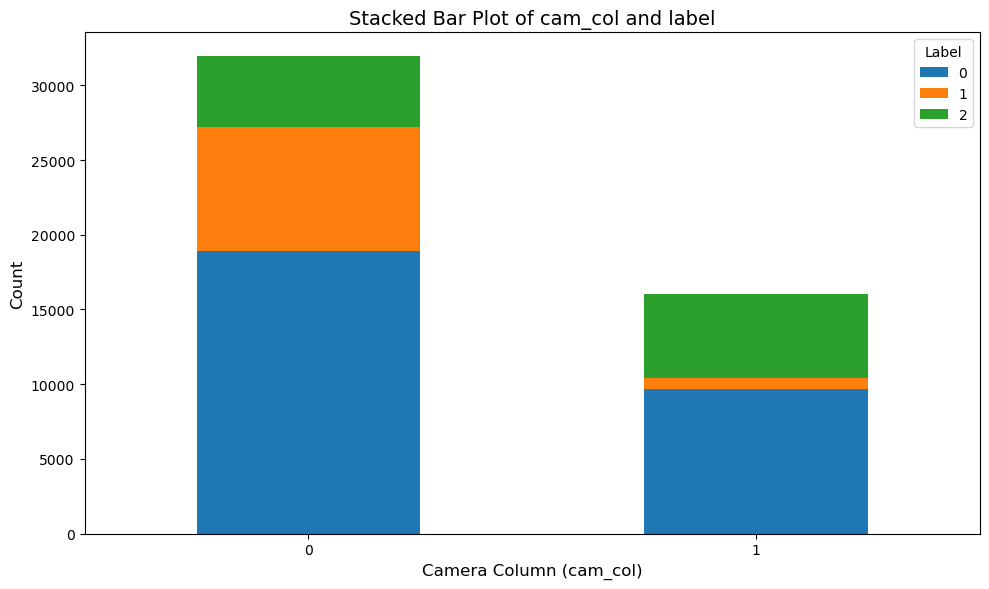

In [41]:
cross_tab = pd.crosstab(index=X_train['cluster_label'], columns=X_train['label'])

# Plot the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Camera Column (cam_col)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Stacked Bar Plot of cam_col and label', fontsize=14)
ax.legend(title='Label', fontsize=10)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

## DBSSCAN + PCA

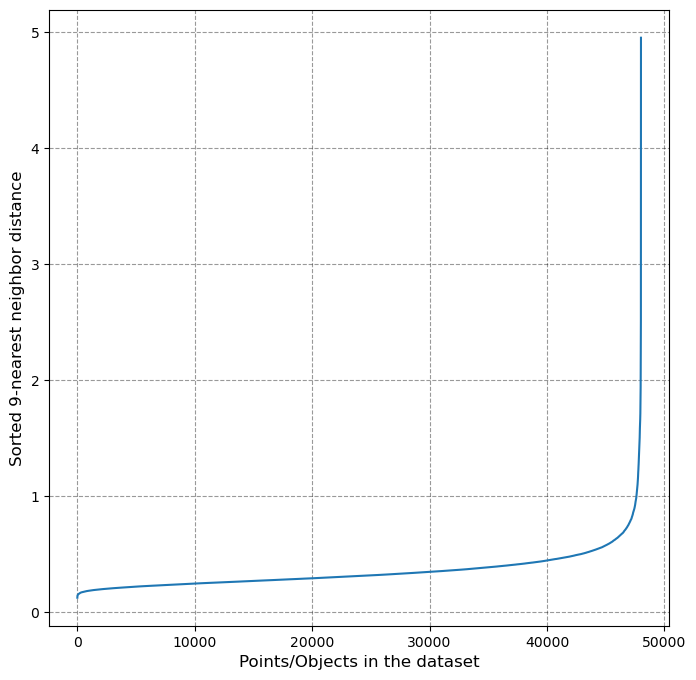

In [42]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * X_train_reduced.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=X_train_reduced, k=k)

In [43]:
dbscan = DBSCAN(eps = 0.5, min_samples = 10)
y_train_pred_db = dbscan.fit_predict(X_train_reduced)

In [44]:
X_train['cluster_label_dbscan'] = y_train_pred_db

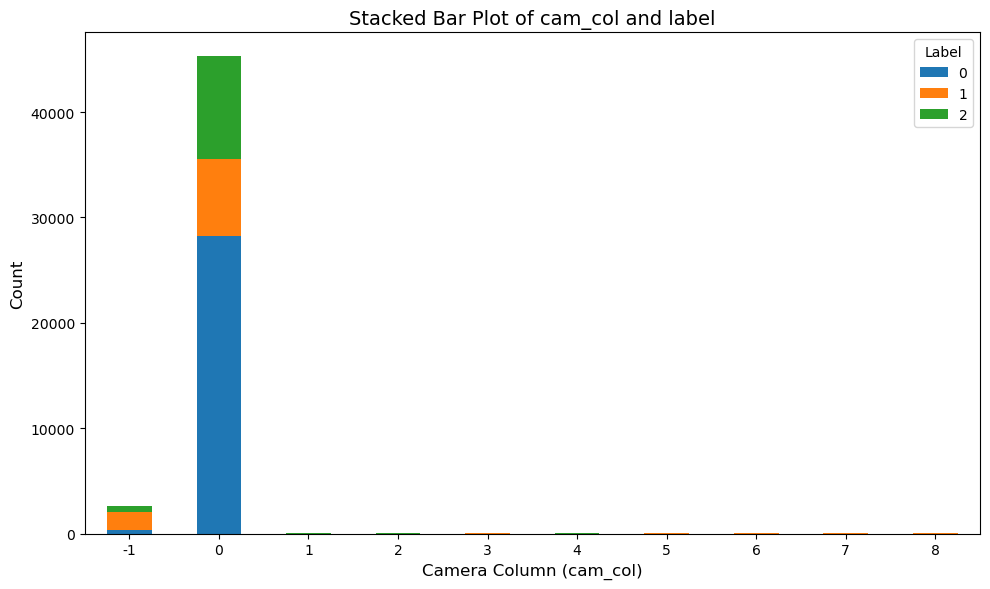

In [45]:
cross_tab = pd.crosstab(index=X_train['cluster_label_dbscan'], columns=X_train['label'])

# Plot the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Camera Column (cam_col)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Stacked Bar Plot of cam_col and label', fontsize=14)
ax.legend(title='Label', fontsize=10)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

## Kmeans no PCA

In [46]:
X_train_reduced = X_train[float_columns]

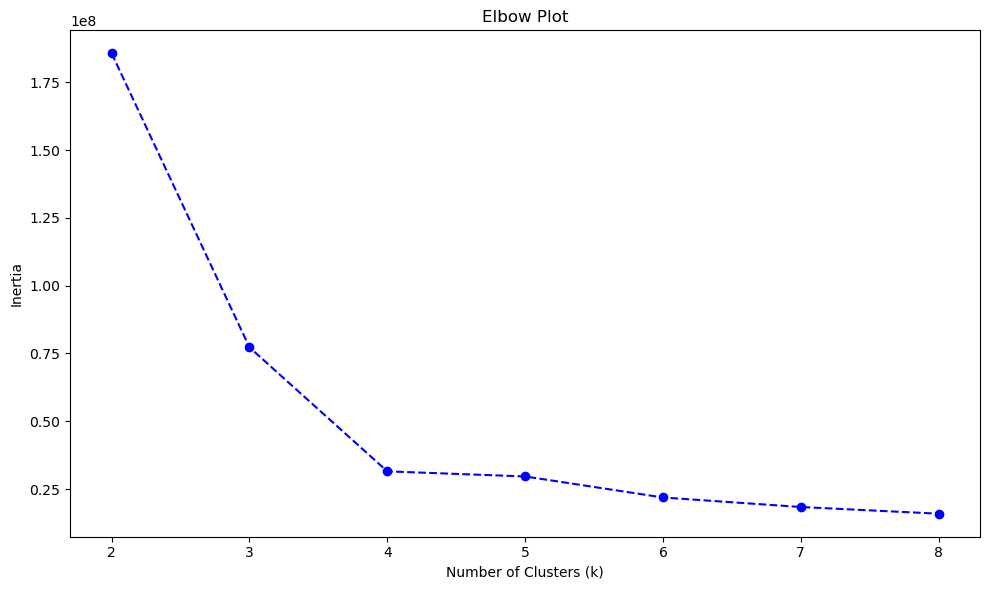

In [47]:
# Range of k values to evaluate
k_range = range(2, 9)

# To store results for plotting
inertia = []
silhouette_scores = []

# Loop over the different k values
for k in k_range:
    # Fit the KMeans model
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(X_train_reduced)
    
    # Inertia for the Elbow Plot
    inertia.append(k_means.inertia_)

# Plot the Elbow Curve (Inertia)
plt.figure(figsize=(10, 6))

plt.plot(k_range, inertia, marker='o', color='b', linestyle='--')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Show both plots
plt.tight_layout()
plt.show()

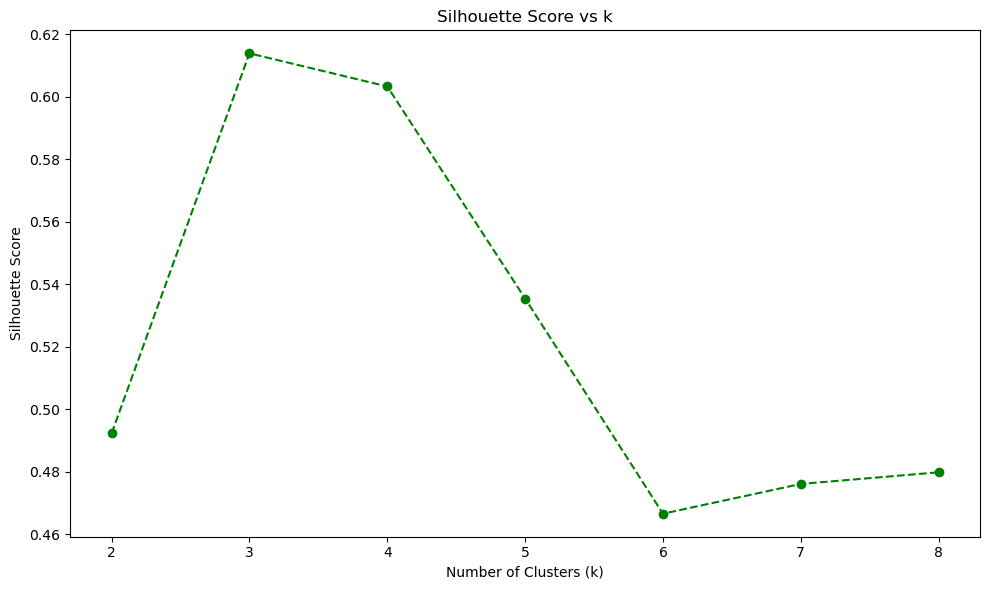

In [48]:
# Range of k values to evaluate
k_range = range(2, 9)

silhouette_scores = []

# Loop over the different k values
for k in k_range:
    # Fit the KMeans model
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(X_train_reduced)
    
    # Calculate silhouette score for the current k
    silhouette_avg = silhouette_score(X_train_reduced, k_means.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='g', linestyle='--')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

# Show both plots
plt.tight_layout()
plt.show()

In [49]:
k_means = KMeans(n_clusters=3, random_state=42)

In [50]:
y_train_pred = k_means.fit_predict(X_train_reduced)
X_train['cluster_label_kmeans'] = y_train_pred
crosstab_cluster_label = pd.crosstab(X_train['cluster_label_kmeans'], X_train['label'])

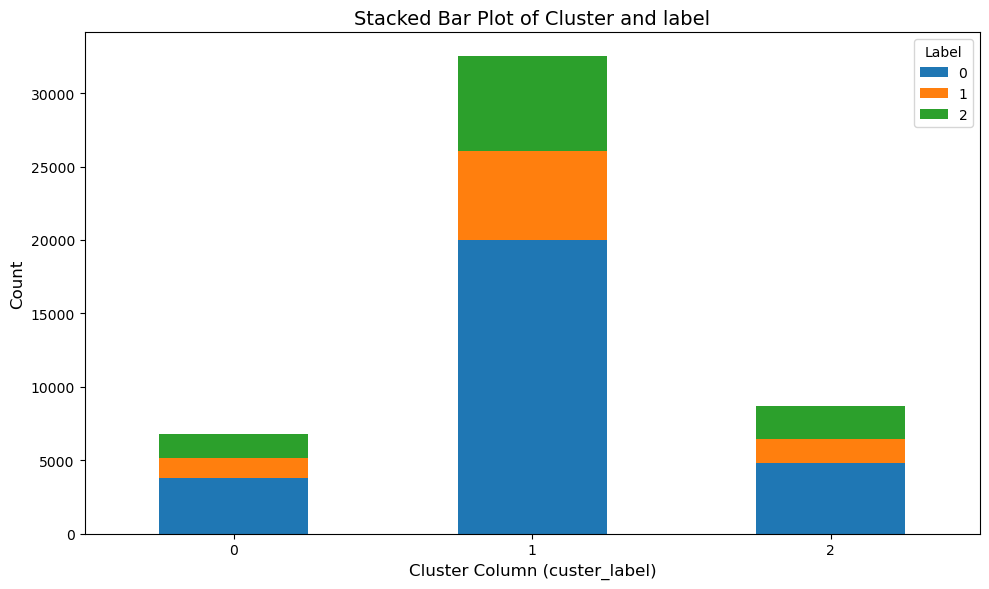

In [51]:
cross_tab = pd.crosstab(X_train['cluster_label_kmeans'], X_train['label'])

# Plot the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Cluster Column (custer_label)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Stacked Bar Plot of Cluster and label', fontsize=14)
ax.legend(title='Label', fontsize=10)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [52]:
crosstab_cluster_label

label,0,1,2
cluster_label_kmeans,,,
0,3808,1368,1609
1,19977,6070,6468
2,4812,1597,2291


 Insights:
1. **Cluster 2 Analysis:**
   - The overwhelming representation of label 0 in cluster 2 suggests that KMeans has grouped a large, homogeneous subset of label 0 instances into this cluster.

2. **Clusters 0 and 1 Analysis:**
   - These clusters represent more mixed or ambiguous groupings of the labels, indicating overlap in feature space for these labels.


## DBSCAN no PCA

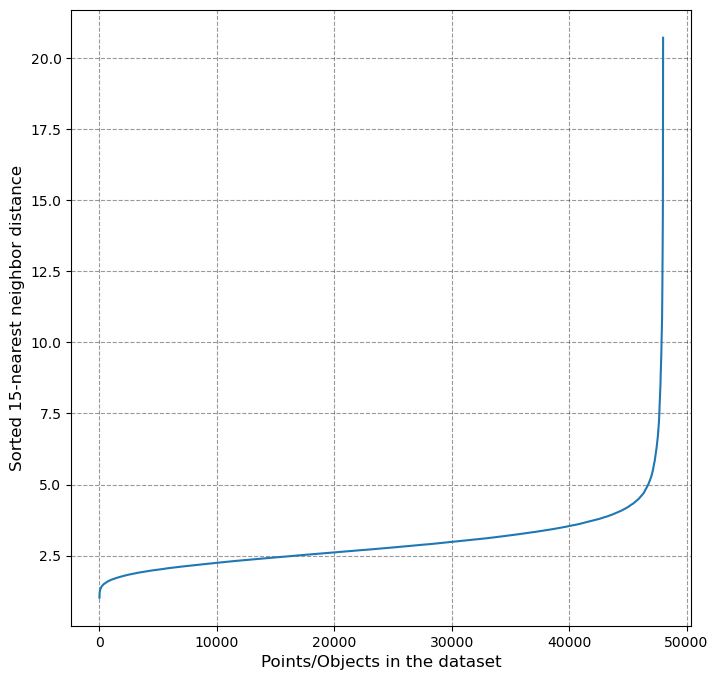

In [53]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * X_train_reduced.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=X_train_reduced, k=k)

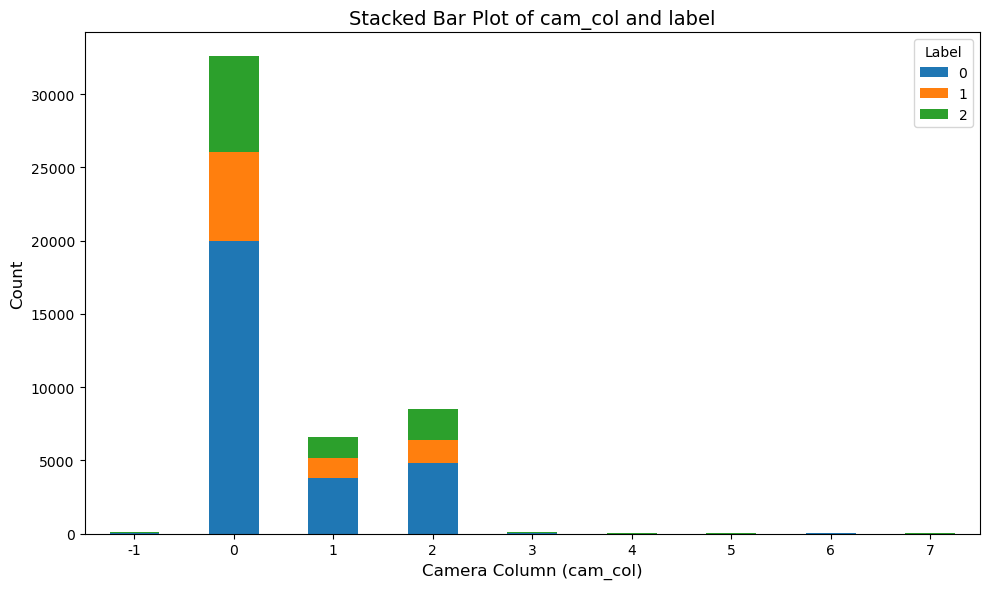

In [54]:
dbscan = DBSCAN(eps = 9, min_samples = 16)
y_train_pred_db = dbscan.fit_predict(X_train_reduced)
X_train['cluster_label_dbscan'] = y_train_pred_db
cross_tab = pd.crosstab(index=X_train['cluster_label_dbscan'], columns=X_train['label'])

# Plot the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Camera Column (cam_col)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Stacked Bar Plot of cam_col and label', fontsize=14)
ax.legend(title='Label', fontsize=10)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [55]:
X_train['label'].value_counts()

label
0    28597
2    10368
1     9035
Name: count, dtype: int64